In [901]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [799]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
SalePrice = train.iloc[:, -1]

In [800]:
# total # of features and samples
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [801]:
df = pd.concat([train.iloc[:, :-1], test])

---

In [802]:
# handling missing value first
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [803]:
# see which columns have null value
df.columns[df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [804]:
# Real missing value
# MSZoning, Utilities, Exterior1st, Exterior2nd, Electrical, KitchenQual, Functional, SaleType
df['MSZoning'].fillna(value=df['MSZoning'].value_counts().idxmax(), inplace=True)
# drop since almost every data has the exact same value in this feature.
df.drop('Utilities', axis=1, inplace=True)
df['Exterior1st'].fillna(value=df['Exterior1st'].value_counts().idxmax(), inplace=True)
df['Exterior2nd'].fillna(value=df['Exterior2nd'].value_counts().idxmax(), inplace=True)
df['Electrical'].fillna(value=df['Electrical'].value_counts().idxmax(), inplace=True)
df['KitchenQual'].fillna(value=df['KitchenQual'].value_counts().idxmax(), inplace=True)
df['Functional'].fillna(value=df['Functional'].value_counts().idxmax(), inplace=True)
df['SaleType'].fillna(value=df['SaleType'].value_counts().idxmax(), inplace=True)

In [805]:
# Some missing value means "None" instead of real NaN.
# LotFrontage, Alley, MasVnrArea, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, FireplaceQu, GarageType, GarageFinish, 
# GarageCars, GarageQual, GarageCond, Fence, MiscFeature
df['LotFrontage'].fillna(value=0, inplace=True)
df['Alley'].fillna(value='None', inplace=True)
df['MasVnrType'].fillna(value='None', inplace=True)
df['MasVnrArea'].fillna(value=0, inplace=True)
df['BsmtQual'].fillna(value='None', inplace=True)
df['BsmtCond'].fillna(value='None', inplace=True)
df['BsmtExposure'].fillna(value='None', inplace=True)
df['BsmtFinType1'].fillna(value='None', inplace=True)
df['BsmtFinSF1'].fillna(value=0, inplace=True)
df['BsmtFinType2'].fillna(value='None', inplace=True)
df['BsmtFinSF2'].fillna(value=0, inplace=True)
df['BsmtUnfSF'].fillna(value=0, inplace=True)
df['TotalBsmtSF'].fillna(value=0, inplace=True)
df['BsmtFullBath'].fillna(value=0, inplace=True)
df['BsmtHalfBath'].fillna(value=0, inplace=True)
df['FireplaceQu'].fillna(value='None', inplace=True)
df['GarageType'].fillna(value='None', inplace=True)
df['GarageFinish'].fillna(value='None', inplace=True)
df['GarageCars'].fillna(value=0, inplace=True)
df['GarageQual'].fillna(value='None', inplace=True)
df['GarageCond'].fillna(value='None', inplace=True)
# since replace the missing value in GarageYrBlt with 0 will skew the data a lot,
# we replace the missing year with the most frequent value
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].value_counts().idxmax(), inplace=True)
df['GarageArea'].fillna(value=0, inplace=True)
df['Fence'].fillna(value='None', inplace=True)
df['MiscFeature'].fillna(value='None', inplace=True)

In [806]:
# drop id & PoolQC (only 10 data has this attribute)
df.drop('Id', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)

In [807]:
# check if there's any columns that contain null value
# and then check the shape of dataframe again.
print(df.isnull().any().sum())
print(df.shape)

0
(2919, 77)


In [808]:
train = df.iloc[:train.shape[0], :]
train = train.assign(SalePrice = SalePrice)
train.shape

(1460, 78)

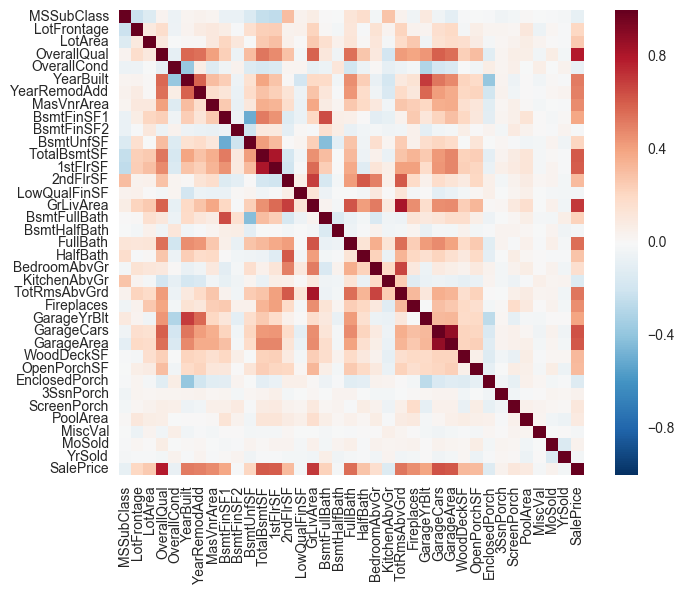

In [809]:
# After dealing with null values, let's get into correlation matrix!
corr = train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, square=True)

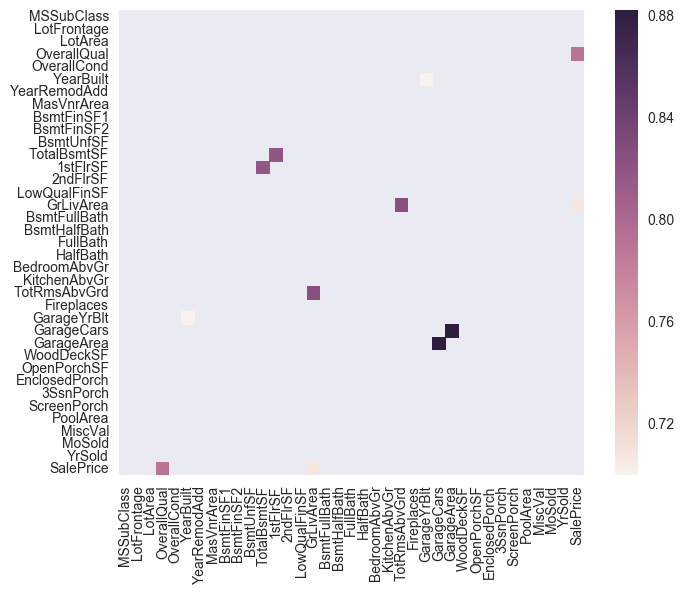

In [810]:
# get the df with high correlation
high_corr = corr[corr > 0.7][corr < 1]
high_corr_index = np.argwhere(high_corr.notnull().values).tolist()  # get its' index
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr, square=True)

In [811]:
for index in high_corr_index:
    if index[0] >= index[1]:
        continue
    if corr.columns[index[0]] == 'SalePrice' or corr.columns[index[1]] == 'SalePrice':
        continue
    if corr.iloc[-1, index[0]] > corr.iloc[-1, index[1]]:
        # preserver the one with larger correlation with saleprice as feature
        df.drop(corr.columns[index[1]], inplace=True, axis=1, errors='ignore')
        print('drop:', corr.columns[index[1]])
    else:
        df.drop(corr.columns[index[0]], inplace=True, axis=1, errors='ignore')
        print('drop:', corr.columns[index[0]])

drop: GarageYrBlt
drop: 1stFlrSF
drop: TotRmsAbvGrd
drop: GarageArea


In [812]:
df.shape

(2919, 73)

According to the data_desciption file,
we can know that some columns with numeric values do not have ordinal meaning.
For instance, numbers in MSSubClass just mean that they're different type of house.
So we have to process these columns first.
non-ordinal meaning: MSSubClass, YearBuilt, YearRemodAdd, MoSold, YrSold

In [813]:
df['MSSubClass'] = df['MSSubClass'].astype(object)

In [814]:
# Let's start with numeric columns
numeric = df.select_dtypes(include=[np.number])

In [815]:
numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [816]:
# right skew, do log transform later.
# left skew, do square root later.
right_skew = numeric.columns[numeric.skew() > 0.75]
left_skew = numeric.columns[numeric.skew() < -0.75]

In [817]:
# Let's see how many skew data we have.
print('right_skew:', len(right_skew))
print('left_skew:', len(left_skew))

right_skew: 18
left_skew: 0


In [818]:
right_skew

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [819]:
# Great, it looks like we don't have any left skew data.
# Now, let's take a look at what the right_skew data looks like.
def plot_subplot(data, col_name):
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))
    fig.tight_layout() # add some distance between subplots
    row = 0
    col = 0
    for name in col_name:
        sns.distplot(data[name], kde=False, ax=axs[row][col])
        col += 1
        if col == 4:
            row += 1
            col = 0
    plt.show()

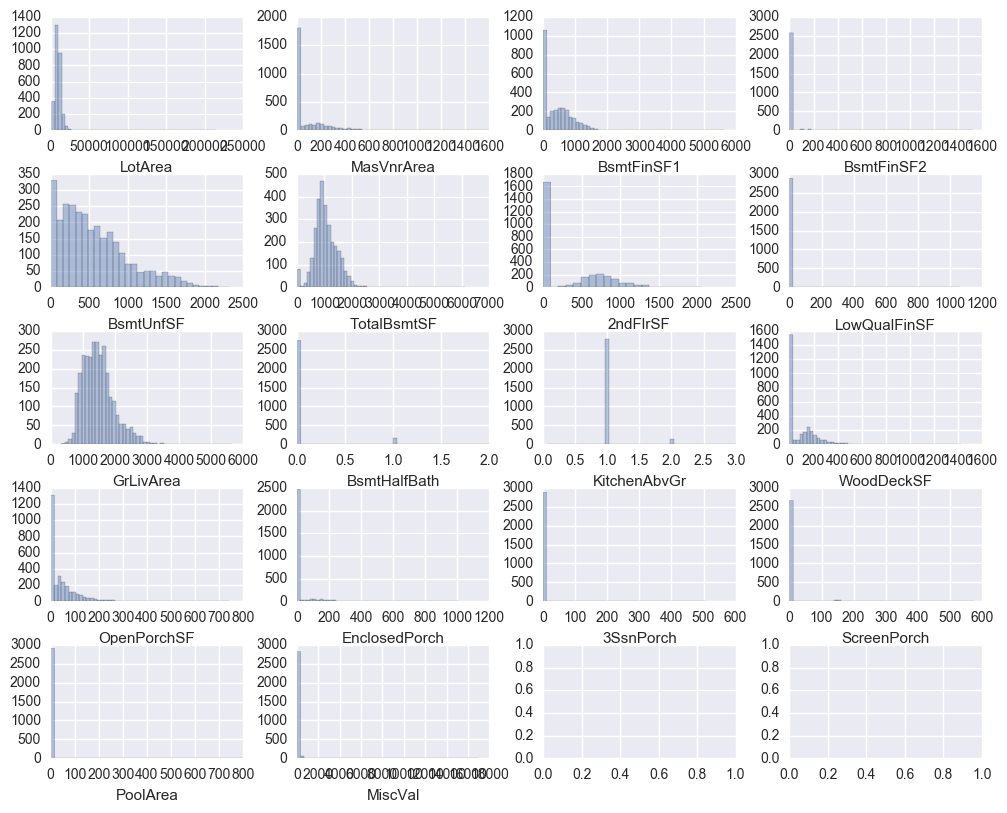

In [820]:
plot_subplot(numeric, right_skew)

In [821]:
# For skewness-related transformation, see: http://fmwww.bc.edu/repec/bocode/t/transint.html
# do standlerization
for col in numeric.columns:
    # right skew, add a constant since we cannot have negative value in log.
    k = min(df[col])
    if df[col].skew() > 0.75:
        df[col] = np.log1p(df[col] + 1 - k)
    # do normalization to all numerical data
    df[col] = StandardScaler().fit_transform(df[col][:,np.newaxis])

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [822]:
right_skew

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

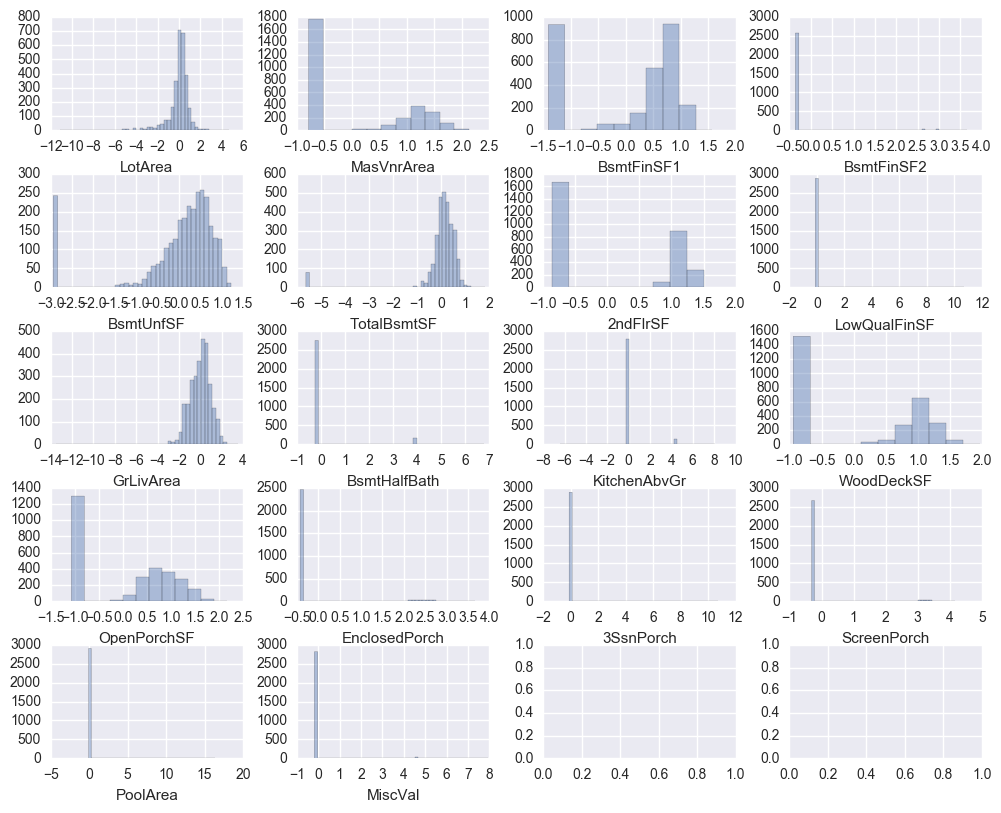

In [823]:
# Let's see how data looks like after applying data transformation
plot_subplot(df, right_skew)

In [824]:
df = pd.get_dummies(df, drop_first=True)

In [825]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.216075,-0.019433,0.646183,-0.507284,1.046258,0.896833,1.216136,0.791841,-0.361306,-0.389962,...,0,0,0,0,1,0,0,0,1,0
1,0.664158,0.188365,-0.063185,2.188279,0.154764,-0.395604,-0.788749,0.913618,-0.361306,-0.017514,...,0,0,0,0,1,0,0,0,1,0
2,0.305692,0.441000,0.646183,-0.507284,0.980221,0.848965,1.133935,0.652452,-0.361306,0.230928,...,0,0,0,0,1,0,0,0,1,0
3,0.066714,0.179946,0.646183,-0.507284,-1.859351,-0.682812,-0.788749,0.350615,-0.361306,0.359155,...,0,0,0,0,1,0,0,0,0,0
4,0.783647,0.809268,1.355551,-0.507284,0.947203,0.753229,1.467171,0.763838,-0.361306,0.302127,...,0,0,0,0,1,0,0,0,1,0


In [826]:
train = df.iloc[:train.shape[0], :]
test = df.iloc[train.shape[0]:, :]

In [828]:
train = train.assign(SalePrice = SalePrice)

In [829]:
if True:
    train.to_csv('transformed_train.csv', index=False)
    test.to_csv('transformed_test.csv', index=False)

In [830]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.216075,-0.019433,0.646183,-0.507284,1.046258,0.896833,1.216136,0.791841,-0.361306,-0.389962,...,0,0,0,1,0,0,0,1,0,208500
1,0.664158,0.188365,-0.063185,2.188279,0.154764,-0.395604,-0.788749,0.913618,-0.361306,-0.017514,...,0,0,0,1,0,0,0,1,0,181500
2,0.305692,0.441000,0.646183,-0.507284,0.980221,0.848965,1.133935,0.652452,-0.361306,0.230928,...,0,0,0,1,0,0,0,1,0,223500
3,0.066714,0.179946,0.646183,-0.507284,-1.859351,-0.682812,-0.788749,0.350615,-0.361306,0.359155,...,0,0,0,1,0,0,0,0,0,140000
4,0.783647,0.809268,1.355551,-0.507284,0.947203,0.753229,1.467171,0.763838,-0.361306,0.302127,...,0,0,0,1,0,0,0,1,0,250000


In [831]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.664158,0.492144,-0.772552,0.391237,-0.340510,-1.113625,-0.788749,0.638375,2.225764,-0.047086,...,0,0,0,0,1,0,0,0,1,0
1,0.694031,0.810021,-0.063185,0.391237,-0.439565,-1.257229,0.959680,0.891983,-0.361306,0.191819,...,0,0,0,0,1,0,0,0,1,0
2,0.484925,0.762252,-0.772552,-0.507284,0.848148,0.657493,-0.788749,0.834310,-0.361306,-0.442641,...,0,0,0,0,1,0,0,0,1,0
3,0.604414,0.250417,-0.063185,0.391237,0.881166,0.657493,0.257470,0.732333,-0.361306,0.059618,...,0,0,0,0,1,0,0,0,1,0
4,-0.441114,-0.935292,1.355551,-0.507284,0.683057,0.370284,-0.788749,0.423744,-0.361306,0.731132,...,0,0,0,0,1,0,0,0,1,0


In [832]:
# apply log transformation to saleprice
train['SalePrice'] = np.log1p(train['SalePrice'])

In [833]:
y = train.iloc[:, -1]
X = train.iloc[:, :-1]

---

In [1177]:
# finish preparing data.
# Let's start to train and model!
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xgb
import operator
import os

In [1178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [1179]:
# Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between 
# the logarithm of the predicted value and the logarithm of the observed sales price. 
def RMSE(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)**0.5

In [1180]:
def svr_validate(X_train, y_train, X_test, y_test, C=1.0):
    clf = SVR(C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return RMSE(y_pred, y_test)

In [1181]:
def svr_predict(X, y, C, test):
    clf = SVR(C=C)
    clf.fit(X, y)
    log_result = clf.predict(test)
    return np.expm1(log_result)

In [1182]:
def plot_loss(param, loss, x_label, y_label):
    index, value = min(enumerate(loss), key=operator.itemgetter(1))
    data_num = len(loss)
    print("best performance:", value, x_label, ':',param[index])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(param, loss)
    plt.show()
    return param[index]

In [1183]:
# id starts from 1461
def save_result(result, file_name='submission.csv'):
    path = os.path.join('submission', file_name)
    df = pd.DataFrame({'Id': list(range(1461, result.shape[0]+1461)),'SalePrice': result})
    df.to_csv(path, index=False)

In [1184]:
svr_validate(X_train, y_train, X_test, y_test)

0.13872132234725204

In [1204]:
# find the best parameter: 4.82 from experiment
init = 0.01
cs = []
l_loss = []
for i in range(1, 1001):
    c = i*init
    loss = svr_validate(X_train, y_train, X_test, y_test, C=c)
    cs.append(c)
    l_loss.append(loss)

best performance: 0.138362248051 C : 0.72


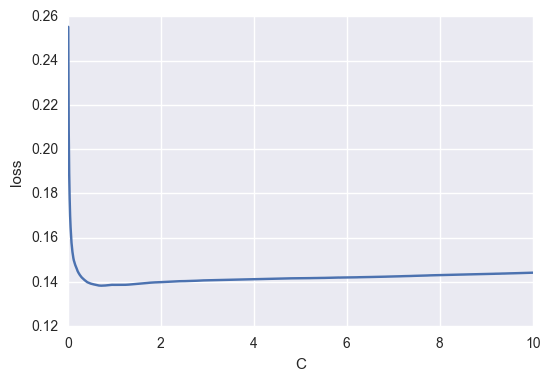

In [1205]:
best_c = plot_loss(cs, l_loss, 'C', 'loss')

In [1207]:
# use the selected parameter to do prediction
svr_result = svr_predict(X, y, best_c, test)

In [1208]:
# save the model result
save_result(result=svr_result, file_name='svm_submission.csv')

In [1187]:
# using pca to do dimension reduction
pca = PCA(n_components=200)
transformed_data = pca.fit_transform(pd.concat([X, test]))
X_pca = transformed_data[:X.shape[0], :]
test_pca = transformed_data[X.shape[0]:, :]
# cross-validate pca to do dimension reduction
X_pca_train, X_pca_test, y_pca_train, y_pac_test = train_test_split(X_pca, y, test_size=0.33, random_state=20)

In [1188]:
svr_validate(X_pca_train, y_pca_train, X_pca_test, y_pac_test)

0.14084732886830217

In [1125]:
# find the best parameter: 4.82 from experiment
init = 0.01
pca_cs = []
pca_l_loss = []
for i in range(1, 1001):
    c = i*init
    loss = svr_validate(X_pca_train, y_train, X_pca_test, y_test, C=c)
    pca_cs.append(c)
    pca_l_loss.append(loss)

best performance: 0.140570159691 C : 0.8


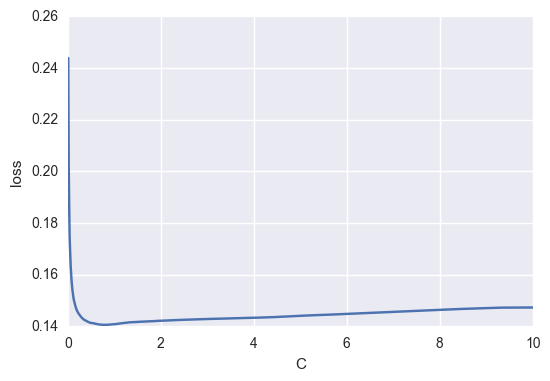

In [1126]:
best_pca_c = plot_loss(pca_cs, pca_l_loss, 'C', 'loss')

In [1190]:
# use the selected parameter to do prediction
clf = SVR(C=best_pca_c)
clf.fit(X_pca, y)
log_result = clf.predict(test_pca)
svr_pca_result = svr_predict(X, y, best_c, test)

In [1191]:
# save the model result
save_result(result=svr_pac_result, file_name='svm_pca_submission.csv')

---

In [905]:
# try xgboost: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# a nice tutorial toward tuning and understanding parameters of xgboost.
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(RMSE(y_pred, y_test))

0.131838856729


In [1015]:
# tuning parameters
init = 0.1
max_depth = []
losses = []
for i in range(3, 11):
    xgb_model = xgb.XGBRegressor(max_depth=i, learning_rate=0.05, n_estimators=400).fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    max_depth.append(i)
    loss = RMSE(y_pred, y_test)
    losses.append(loss)

best performance: 0.129238802632 max_depth: 10


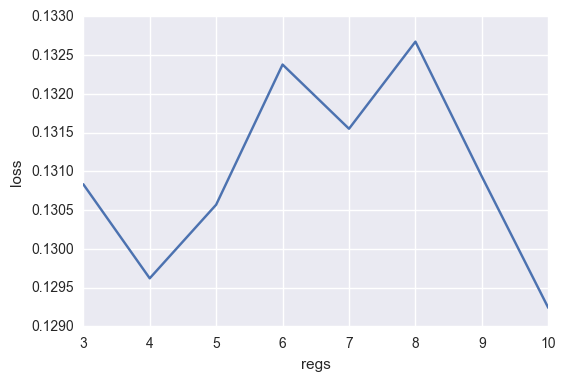

In [1016]:
index, value = min(enumerate(losses), key=operator.itemgetter(1))
data_num = train.shape[1]
print("best performance:", value, "max_depth:", max_depth[index])
plt.plot(max_depth, losses)
plt.xlabel("regs")
plt.ylabel("loss")
plt.show()

In [1022]:
# make prediction, reg_lambda=1.5
xgb_model = xgb.XGBRegressor(max_depth=10, learning_rate=0.05, n_estimators=400).fit(X, y)
log_result = xgb_model.predict(test)
xgb_result = np.exp(log_result)
save_result(xgb_result, 'xgb_submission.csv')

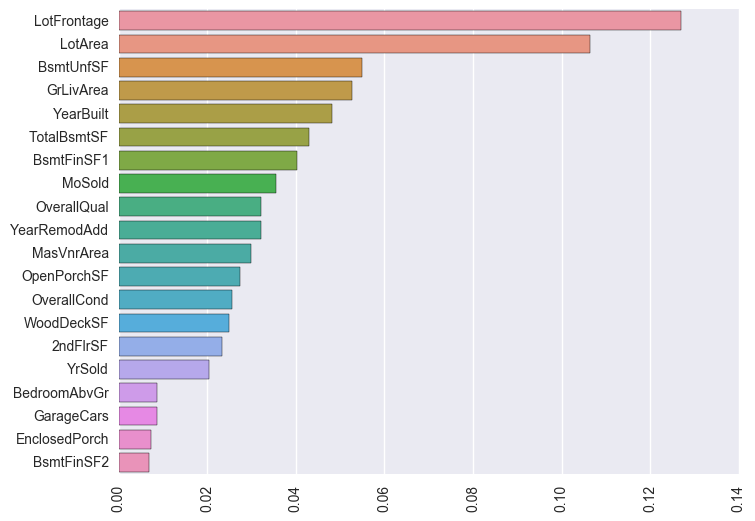

In [1019]:
# Let's plot the feature importance.
feature_importance = pd.Series(data=xgb_model.feature_importances_, index=train.columns[:-1]).sort_values(ascending=False)
top_n = 20
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.barplot(x=feature_importance.get_values()[:top_n], y=feature_importance.index[:top_n])

---

In [1113]:
# Let's try some other model!
from keras.models import Sequential
from keras.layers import Dense, Activation

In [1114]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [1115]:
simple_nn = Sequential()
simple_nn.add(Dense(64, activation='relu', kernel_initializer='normal', input_shape=(train.shape[1]-1,)))
simple_nn.add(Dense(32, kernel_initializer='normal'))
simple_nn.add(Dense(1, kernel_initializer='normal'))
simple_nn.compile(loss=root_mean_squared_error, optimizer='adam')

In [1116]:
simple_nn_history = simple_nn.fit(X.as_matrix(), y.as_matrix(), validation_split=0.3, epochs=50, batch_size=32)

Train on 1021 samples, validate on 439 samples
Epoch 1/50
1021/1021 [==============================] - 0s - loss: 10.4314 - val_loss: 6.2982
Epoch 2/50
1021/1021 [==============================] - 0s - loss: 1.8824 - val_loss: 0.6863
Epoch 3/50
1021/1021 [==============================] - 0s - loss: 0.4922 - val_loss: 0.4363
Epoch 4/50
1021/1021 [==============================] - 0s - loss: 0.3461 - val_loss: 0.3744
Epoch 5/50
1021/1021 [==============================] - 0s - loss: 0.3064 - val_loss: 0.3303
Epoch 6/50
1021/1021 [==============================] - 0s - loss: 0.2678 - val_loss: 0.3158
Epoch 7/50
1021/1021 [==============================] - 0s - loss: 0.2497 - val_loss: 0.3188
Epoch 8/50
1021/1021 [==============================] - 0s - loss: 0.2304 - val_loss: 0.2739
Epoch 9/50
1021/1021 [==============================] - 0s - loss: 0.2132 - val_loss: 0.2634
Epoch 10/50
1021/1021 [==============================] - 0s - loss: 0.2096 - val_loss: 0.2331
Epoch 11/50
1021/1021

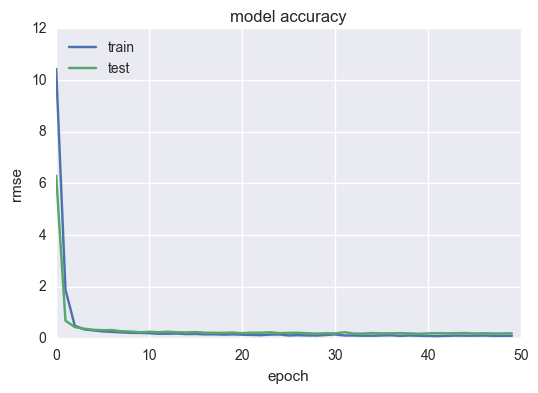

In [1117]:
plt.plot(simple_nn_history.history['loss'])
plt.plot(simple_nn_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1118]:
log_result = simple_nn.predict(test.as_matrix())
simple_nn_result = np.exp(log_result)
simple_nn_result = simple_nn_result.T[0]
save_result(result=simple_nn_result, file_name='nn_submission.csv')

---

In [1194]:
# Ensemble
ensemble_nn = Sequential()
ensemble_nn.add(Dense(2, activation='relu', kernel_initializer='normal', input_shape=(2,)))
ensemble_nn.add(Dense(1, kernel_initializer='normal'))
ensemble_nn.compile(loss=root_mean_squared_error, optimizer='adam')

In [1216]:
svr = SVR(C=best_c)
svr.fit(X, y)
ensemble_data = np.concatenate((svr.predict(X)[:, np.newaxis], xgb_model.predict(X)[:, np.newaxis]), axis=1)

In [1217]:
ensemble_nn_history = model.fit(ensemble_data, y.as_matrix(), validation_split=0.3, epochs=500, batch_size=32)

Train on 1021 samples, validate on 439 samples
Epoch 1/500
1021/1021 [==============================] - 0s - loss: 0.0206 - val_loss: 0.0188
Epoch 2/500
1021/1021 [==============================] - 0s - loss: 0.0205 - val_loss: 0.0206
Epoch 3/500
1021/1021 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0189
Epoch 4/500
1021/1021 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0197
Epoch 5/500
1021/1021 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0185
Epoch 6/500
1021/1021 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0188
Epoch 7/500
1021/1021 [==============================] - 0s - loss: 0.0197 - val_loss: 0.0185
Epoch 8/500
1021/1021 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0188
Epoch 9/500
1021/1021 [==============================] - 0s - loss: 0.0190 - val_loss: 0.0190
Epoch 10/500
1021/1021 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0215
Epoch 11/500

1021/1021 [==============================] - 0s - loss: 0.0174 - val_loss: 0.0176
Epoch 87/500
1021/1021 [==============================] - 0s - loss: 0.0175 - val_loss: 0.0176
Epoch 88/500
1021/1021 [==============================] - 0s - loss: 0.0177 - val_loss: 0.0176
Epoch 89/500
1021/1021 [==============================] - 0s - loss: 0.0184 - val_loss: 0.0180
Epoch 90/500
1021/1021 [==============================] - 0s - loss: 0.0181 - val_loss: 0.0171
Epoch 91/500
1021/1021 [==============================] - 0s - loss: 0.0176 - val_loss: 0.0171
Epoch 92/500
1021/1021 [==============================] - 0s - loss: 0.0179 - val_loss: 0.0171
Epoch 93/500
1021/1021 [==============================] - 0s - loss: 0.0174 - val_loss: 0.0175
Epoch 94/500
1021/1021 [==============================] - 0s - loss: 0.0178 - val_loss: 0.0178
Epoch 95/500
1021/1021 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0178
Epoch 96/500
1021/1021 [==============================] - 0s - 

1021/1021 [==============================] - 0s - loss: 0.0163 - val_loss: 0.0176
Epoch 172/500
1021/1021 [==============================] - 0s - loss: 0.0173 - val_loss: 0.0163
Epoch 173/500
1021/1021 [==============================] - 0s - loss: 0.0161 - val_loss: 0.0162
Epoch 174/500
1021/1021 [==============================] - 0s - loss: 0.0160 - val_loss: 0.0156
Epoch 175/500
1021/1021 [==============================] - 0s - loss: 0.0163 - val_loss: 0.0173
Epoch 176/500
1021/1021 [==============================] - 0s - loss: 0.0165 - val_loss: 0.0156
Epoch 177/500
1021/1021 [==============================] - 0s - loss: 0.0160 - val_loss: 0.0158
Epoch 178/500
1021/1021 [==============================] - 0s - loss: 0.0161 - val_loss: 0.0157
Epoch 179/500
1021/1021 [==============================] - 0s - loss: 0.0164 - val_loss: 0.0158
Epoch 180/500
1021/1021 [==============================] - 0s - loss: 0.0160 - val_loss: 0.0163
Epoch 181/500
1021/1021 [=============================

1021/1021 [==============================] - 0s - loss: 0.0150 - val_loss: 0.0142
Epoch 257/500
1021/1021 [==============================] - 0s - loss: 0.0146 - val_loss: 0.0142
Epoch 258/500
1021/1021 [==============================] - 0s - loss: 0.0149 - val_loss: 0.0154
Epoch 259/500
1021/1021 [==============================] - 0s - loss: 0.0149 - val_loss: 0.0141
Epoch 260/500
1021/1021 [==============================] - 0s - loss: 0.0150 - val_loss: 0.0162
Epoch 261/500
1021/1021 [==============================] - 0s - loss: 0.0150 - val_loss: 0.0155
Epoch 262/500
1021/1021 [==============================] - 0s - loss: 0.0145 - val_loss: 0.0147
Epoch 263/500
1021/1021 [==============================] - 0s - loss: 0.0143 - val_loss: 0.0148
Epoch 264/500
1021/1021 [==============================] - 0s - loss: 0.0172 - val_loss: 0.0142
Epoch 265/500
1021/1021 [==============================] - 0s - loss: 0.0146 - val_loss: 0.0140
Epoch 266/500
1021/1021 [=============================

1021/1021 [==============================] - 0s - loss: 0.0129 - val_loss: 0.0133
Epoch 342/500
1021/1021 [==============================] - 0s - loss: 0.0131 - val_loss: 0.0129
Epoch 343/500
1021/1021 [==============================] - 0s - loss: 0.0135 - val_loss: 0.0127
Epoch 344/500
1021/1021 [==============================] - 0s - loss: 0.0139 - val_loss: 0.0130
Epoch 345/500
1021/1021 [==============================] - 0s - loss: 0.0130 - val_loss: 0.0132
Epoch 346/500
1021/1021 [==============================] - 0s - loss: 0.0135 - val_loss: 0.0139
Epoch 347/500
1021/1021 [==============================] - 0s - loss: 0.0131 - val_loss: 0.0143
Epoch 348/500
1021/1021 [==============================] - 0s - loss: 0.0144 - val_loss: 0.0134
Epoch 349/500
1021/1021 [==============================] - 0s - loss: 0.0141 - val_loss: 0.0135
Epoch 350/500
1021/1021 [==============================] - 0s - loss: 0.0156 - val_loss: 0.0149
Epoch 351/500
1021/1021 [=============================

1021/1021 [==============================] - 0s - loss: 0.0119 - val_loss: 0.0112
Epoch 427/500
1021/1021 [==============================] - 0s - loss: 0.0126 - val_loss: 0.0134
Epoch 428/500
1021/1021 [==============================] - 0s - loss: 0.0122 - val_loss: 0.0114
Epoch 429/500
1021/1021 [==============================] - 0s - loss: 0.0117 - val_loss: 0.0130
Epoch 430/500
1021/1021 [==============================] - 0s - loss: 0.0128 - val_loss: 0.0112
Epoch 431/500
1021/1021 [==============================] - 0s - loss: 0.0130 - val_loss: 0.0113
Epoch 432/500
1021/1021 [==============================] - 0s - loss: 0.0117 - val_loss: 0.0113
Epoch 433/500
1021/1021 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0112
Epoch 434/500
1021/1021 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0112
Epoch 435/500
1021/1021 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0111
Epoch 436/500
1021/1021 [=============================

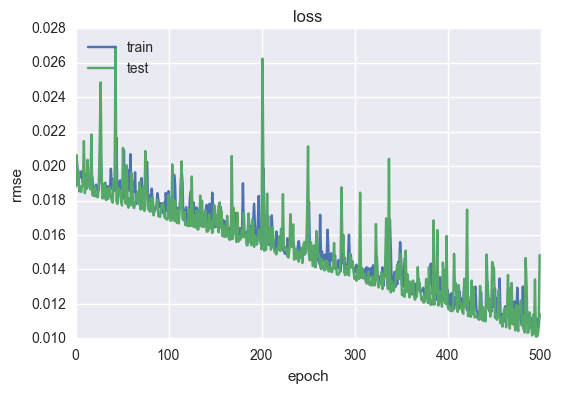

In [1218]:
plt.plot(ensemble_nn_history.history['loss'])
plt.plot(ensemble_nn_history.history['val_loss'])
plt.title('loss')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1224]:
log_result = ensemble_nn.predict(ensemble_data)
log_result = log_result.T[0]
ensemble_result = np.exp(log_result)
save_result(ensemble_result, 'ensemble.csv')

In [1225]:
# try random ensemble given different percentage to each model

In [1226]:
save_result(np.exp((svr.predict(test)*0.75 + xgb_model.predict(test)*0.25)), 'random_ensemble.csv')